In [1]:
import os
import sys
import datetime

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util

In [2]:
dir = os.path.join(array_dir, 'sample_skypy_lens_OLD')

load all

In [59]:
grid_oversample = [1, 3, 5]
num_samples = [100, 1000, 10000, 100000, 1000000, 10000000]

ideal = np.load(os.path.join(dir, 'sample_skypy_lens_5_10000000.npy'))

# all_files = glob(dir + '/sample_skypy_lens_*.npy')
# grid_1 = [np.load(i) for i in all_files if '_1_' in i]
# grid_3 = [np.load(i) for i in all_files if '_3_' in i]
# grid_5 = [np.load(i) for i in all_files if '_5_' in i]

grid_1, grid_3, grid_5 = [], [], []

for grid in grid_oversample:
    for num in num_samples:
        file = glob(dir + f'/sample_skypy_lens_{grid}_{num}.npy')[0]
        array = np.load(file)
        if grid == 1:
            grid_1.append(array)
        elif grid == 3:
            grid_3.append(array)
        elif grid == 5:
            grid_5.append(array)

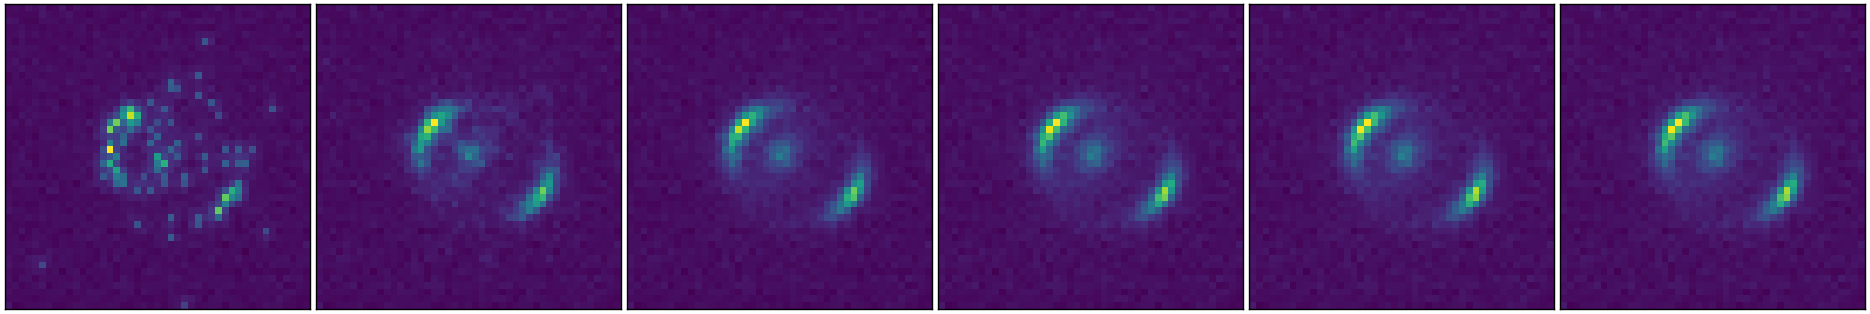

In [60]:
plot.plot_list(grid_1)

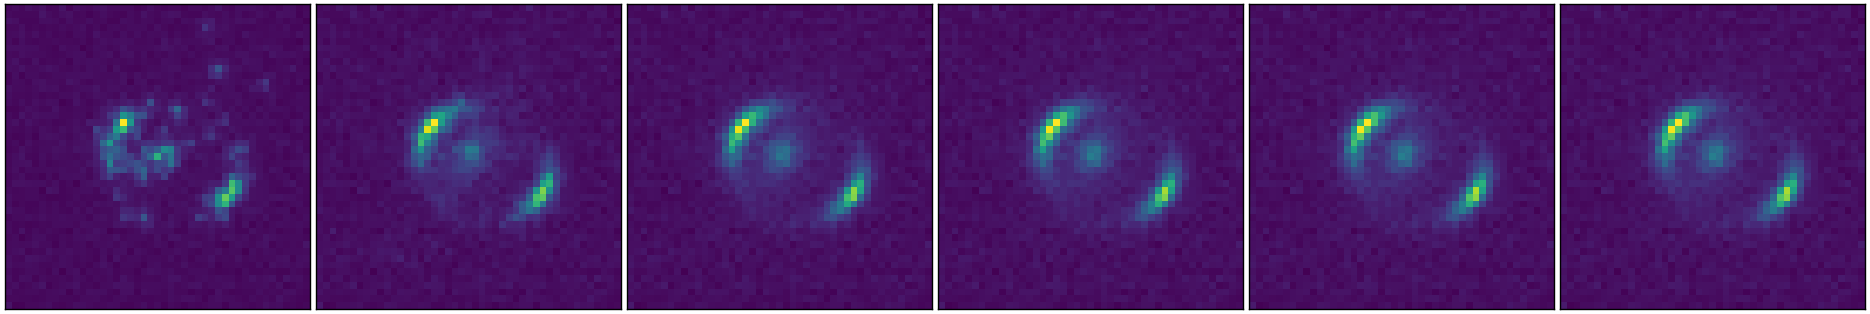

In [61]:
plot.plot_list(grid_3)

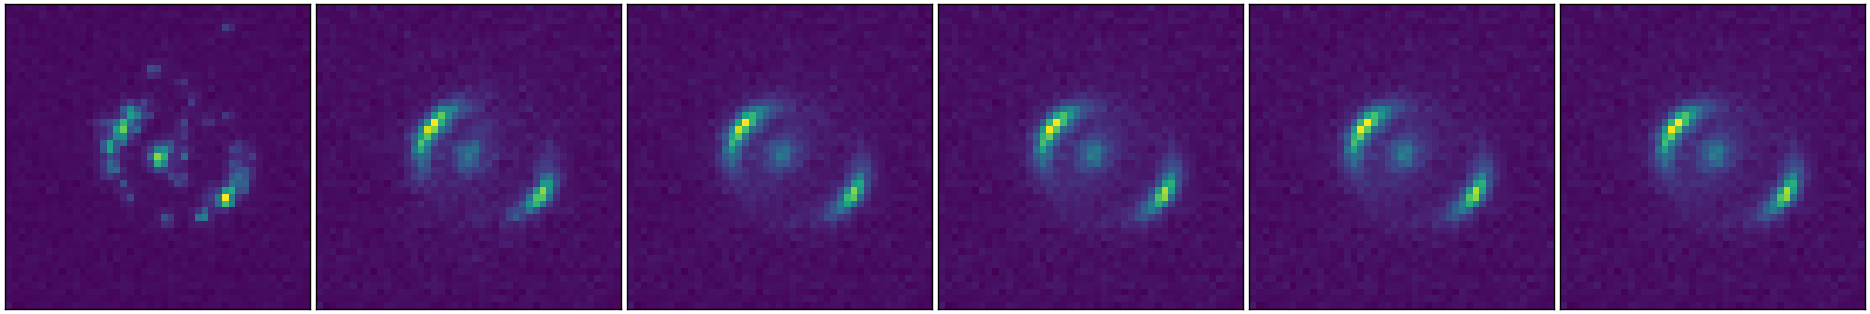

In [62]:
plot.plot_list(grid_5)

get $\chi^2$

In [63]:
chi_squared_1 = [stats.chi_square(i, ideal) for i in grid_1]
chi_squared_3 = [stats.chi_square(i, ideal) for i in grid_3]
chi_squared_5 = [stats.chi_square(i, ideal) for i in grid_5]

chi_squared = np.concatenate([chi_squared_1, chi_squared_3, chi_squared_5])

print(chi_squared_1)
print(chi_squared_3)
print(chi_squared_5)

[-586.7262372661854, 47.057793275062224, 6.544309441240521, 0.5790175772787045, 0.06398283286699966, 0.03327200428047638]
[198.9097938960336, 5.928751715026621, 2.3822991442292234, 0.48248744265279325, 0.041828580088151664, 0.00811316833653822]
[263.4257937019877, 57.44449588343269, 4.068191675184751, 0.24259728192867425, 0.017374953919946347, 0.0]


In [64]:
# print(len(num_samples))
# print(len(chi_squared_1), len(chi_squared_3), len(chi_squared_5))

In [65]:
execution_time_1 = np.load(os.path.join(dir, 'execution_time_1.npy'))
execution_time_3 = np.load(os.path.join(dir, 'execution_time_3.npy'))
execution_time_5 = np.load(os.path.join(dir, 'execution_time_5.npy'))

execution_time_x_1 = np.load(os.path.join(dir, 'execution_time_x_1.npy'))
execution_time_x_3 = np.load(os.path.join(dir, 'execution_time_x_3.npy'))
execution_time_x_5 = np.load(os.path.join(dir, 'execution_time_x_5.npy'))

print(execution_time_x_1)
print(execution_time_1)

[[       1      100]
 [       1     1000]
 [       1    10000]
 [       1   100000]
 [       1  1000000]
 [       1 10000000]]
[ 360.04141021 1288.41302705 3520.17516971 7634.96938419 9520.07872963
 9196.21525741]


In [66]:
execution_time_1_txt = [str(datetime.timedelta(seconds=round(i))) for i in execution_time_1]
execution_time_3_txt = [str(datetime.timedelta(seconds=round(i))) for i in execution_time_3]
execution_time_5_txt = [str(datetime.timedelta(seconds=round(i))) for i in execution_time_5]

In [67]:
print(execution_time_1)

[ 360.04141021 1288.41302705 3520.17516971 7634.96938419 9520.07872963
 9196.21525741]


In [68]:
score_1, score_3, score_5 = [], [], []

for i, _ in enumerate(chi_squared_1):
    score_1.append((1 - np.abs(chi_squared_1[i])) / execution_time_1[i])
    score_3.append((1 - np.abs(chi_squared_3[i])) / execution_time_3[i])
    score_5.append((1 - np.abs(chi_squared_5[i])) / execution_time_5[i])

print(score_1, score_3, score_5)

[-1.626830194138541, -0.03574769294329897, -0.001575009530478289, 5.5138717856924226e-05, 9.832031790029392e-05, 0.0001051223757448438] [-0.4111632195135621, -0.001808322219079073, -0.00012480841138148298, 1.7135707722406278e-05, 1.4279572915927246e-05, 1.2667770171256647e-05] [-0.3974766098008782, -0.01690057884508074, -0.00017289652876007234, 1.346441562407472e-05, 7.518676623557758e-06, 5.051443021693083e-06]


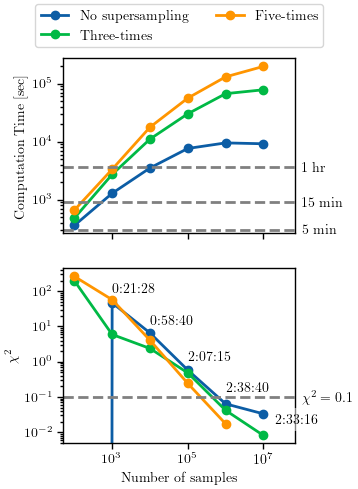

In [102]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(3, 5))

# remove vertical space between axes
# fig.subplots_adjust(hspace=0)

plt.xscale('log')
plt.xlabel('Number of samples')
plt.xlim(5 * 10 ** 1, 7 * 10 ** 7)

ax1 = ax[0].plot(num_samples, execution_time_1, linestyle='-', marker='o', label='No supersampling')
ax2 = ax[0].plot(num_samples, execution_time_3, linestyle='-', marker='o', label='Three-times')
ax3 = ax[0].plot(num_samples, execution_time_5, linestyle='-', marker='o', label='Five-times')
ax[0].set_yscale('log')
ax[0].set_ylabel('Computation Time [sec]')
ax[0].axhline(y=3600, linestyle='--', color='gray')
ax[0].axhline(y=900, linestyle='--', color='gray')
ax[0].axhline(y=300, linestyle='--', color='gray')
x0, x1 = plt.gca().get_xlim()
ax[0].text(x1 * 1.5, 3600, '1 hr', ha='left', va='center')
ax[0].text(x1 * 1.5, 900, '15 min', ha='left', va='center')
ax[0].text(x1 * 1.5, 300, '5 min', ha='left', va='center')

ax[1].plot(num_samples, chi_squared_1, linestyle='-', marker='o')
ax[1].plot(num_samples, chi_squared_3, linestyle='-', marker='o')
ax[1].plot(num_samples[:-1], chi_squared_5[:-1], linestyle='-', marker='o')
ax[1].axhline(y=0.1, linestyle='--', color='gray')
x0, x1 = plt.gca().get_xlim()
ax[1].text(x1 * 1.5, 0.1, '$\chi^2=0.1$', ha='left', va='center')
ax[1].set_yscale('log')
ax[1].set_ylabel('$\chi^2$')
# ax[1].set_ylim(5 * 10 ** -4, 1000)

ax[1].annotate(execution_time_1_txt[0], (num_samples[0] + 1e3, chi_squared_1[0] + 1e1))
ax[1].annotate(execution_time_1_txt[1], (num_samples[1], chi_squared_1[1] + 5e1))
ax[1].annotate(execution_time_1_txt[2], (num_samples[2], chi_squared_1[2] + 5e0))
ax[1].annotate(execution_time_1_txt[3], (num_samples[3], chi_squared_1[3] + 5e-1))
ax[1].annotate(execution_time_1_txt[4], (num_samples[4], chi_squared_1[4] + 8e-2))
t = ax[1].annotate(execution_time_1_txt[5], (num_samples[5] + 1e7, chi_squared_1[5] - 1.5e-2))
t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='none'))

# for i, txt in enumerate(execution_time_3_txt):
#     if i > 2:
#         ax[1].annotate(txt, (num_samples[i], chi_squared_3[i]))

# for i, txt in enumerate(execution_time_5_txt):
#     ax.annotate(txt, (num_samples[i], chi_squared_5[i]))

# ax[2].plot(num_samples[1:], score_1[1:], linestyle='-', marker='o', label='No supersampling')
# ax[2].plot(num_samples[1:], score_3[1:], linestyle='-', marker='o', label='Three-times')
# ax[2].plot(num_samples[1:-1], score_5[1:-1], linestyle='-', marker='o', label='Five-times')
# ax[2].set_ylabel(r'$(1 - |\chi^2|)$ / Computation Time')
# ax[2].set_ylim(-0.0005, 0.0018)

# inset_axes = ax[2].inset_axes(bounds=[0.08,0.55,0.25,0.4])
# inset_axes.plot(num_samples, score_1, linestyle='-', marker='o')
# inset_axes.plot(num_samples, score_3, linestyle='-', marker='o')
# inset_axes.plot(num_samples[:-1], score_5[:-1], linestyle='-', marker='o')
# inset_axes.set_ylim(-1, 0.1)
# inset_axes.set_xscale('log')
# inset_axes.set_xlim(5 * 10 ** 1, 5 * 10 ** 7)
# inset_axes.set_xticks = []

ax[0].legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.35))  # 

plt.savefig(os.path.join(figure_dir, 'calc_params.png'))
plt.show()